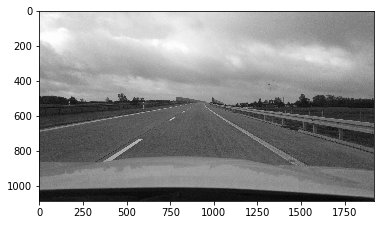

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/photo_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

In [68]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
gradmag = np.sqrt(sobelx**2 + sobely**2)


In [69]:
import numpy as np
gradmag = np.sqrt(sobelx**2 + sobely**2)
gradmag = np.uint8(255*gradmag/np.max(gradmag))
gradmag

array([[ 0,  2,  1, ...,  0,  1,  0],
       [ 2,  4,  4, ...,  0,  4,  3],
       [ 3,  4,  2, ...,  8,  9,  7],
       ..., 
       [ 5,  1, 10, ...,  2,  1,  1],
       [ 6, 12,  6, ...,  2,  3,  2],
       [ 0, 16,  6, ...,  2,  6,  0]], dtype=uint8)

In [72]:
sxbinary = np.zeros_like(gradmag)
sxbinary[(gradmag >= 30) & (gradmag <= 100)] = 1
sxbinary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

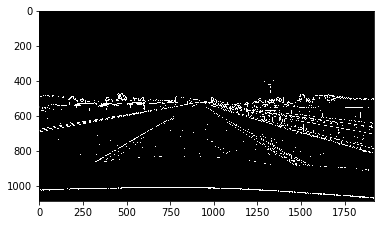

In [73]:
plt.imshow(sxbinary, cmap='gray')
plt.show()

In [48]:
thresh_min = 20
thresh_max = 120
sxbinary = np.zeros_like(scaled_sobel)
sxbinary.shape

(1088, 1920)

In [49]:
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1


In [50]:
sxbinary.shape

(1088, 1920)

<function matplotlib.pyplot.show>

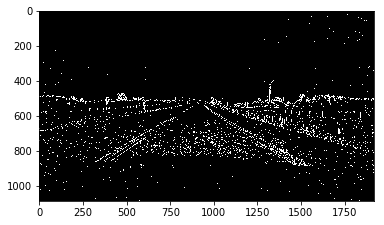

In [51]:
%matplotlib inline 
    
plt.imshow(sxbinary, cmap='gray')
plt.show


In [86]:
image = cv2.imread('img/signs_vehicles_xygrad.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [128]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    if orient == "x":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return sxbinary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    gradmag = np.uint8(255*gradmag/np.max(gradmag))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    
    return binary_output


In [139]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 130))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 130))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(20, 130))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

In [140]:
gradx_bin = np.zeros_like(gradmag)
sxbinary[(gradmag >= 30) & (gradmag <= 100)] = 1

In [141]:
mag_binary.shape

(720, 1280)

In [142]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

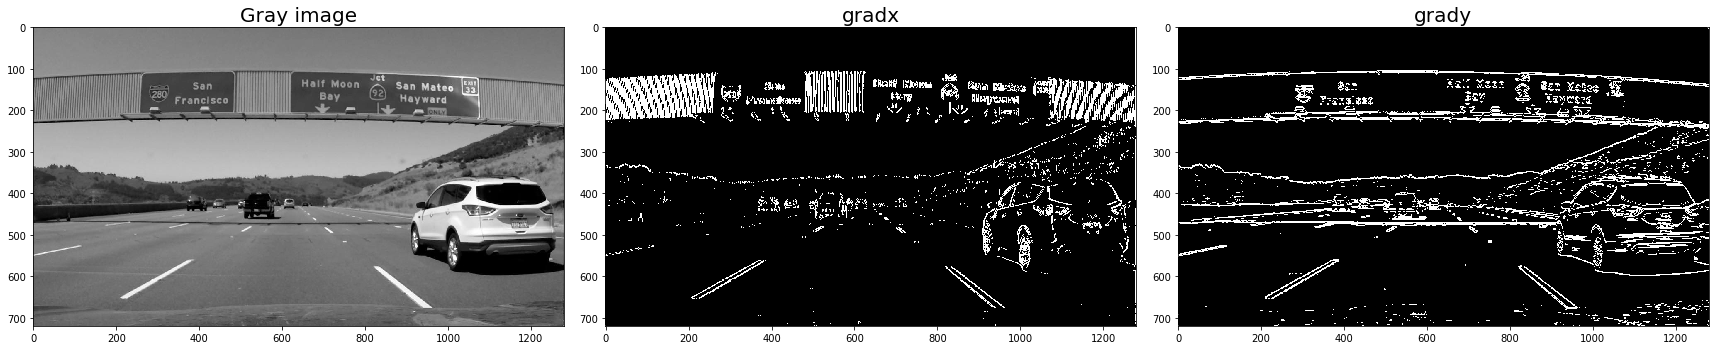

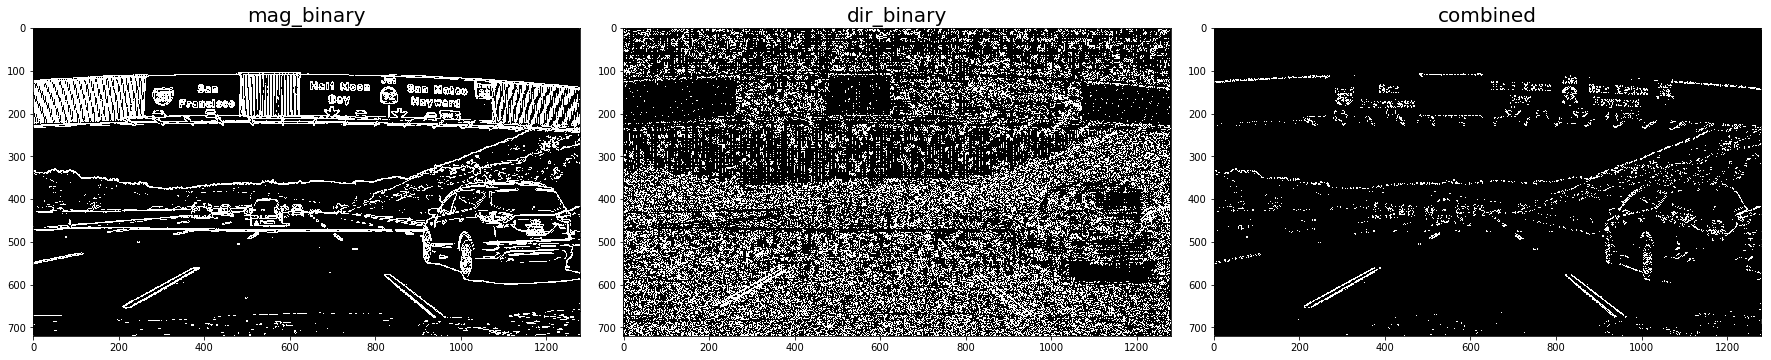

In [143]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))

f.tight_layout()
ax1.imshow(image, cmap="gray")
ax1.set_title('Gray image', fontsize=20)

ax2.imshow(gradx, cmap="gray")
ax2.set_title('gradx', fontsize=20)

ax3.imshow(grady, cmap="gray")
ax3.set_title('grady', fontsize=20)
plt.show()

f2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f2.tight_layout()

ax1.imshow(mag_binary, cmap="gray")
ax1.set_title('mag_binary', fontsize=20)

ax2.imshow(dir_binary, cmap="gray")
ax2.set_title('dir_binary', fontsize=20)

ax3.imshow(combined, cmap="gray")
ax3.set_title('combined', fontsize=20)


plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


In [127]:
np.pi


3.141592653589793